In [9]:
import pandas as pd

daily_data = pd.read_csv('../data/train.csv')
daily_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [10]:
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
np.set_printoptions(suppress=True)

daily_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [11]:
import calendar
from datetime import datetime

daily_data["date"] = daily_data.datetime.apply(lambda x : x.split()[0])
daily_data["hour"] = daily_data.datetime.apply(lambda x : x.split()[1].split(":")[0])
daily_data["weekday"] = daily_data.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
daily_data["month"] = daily_data.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
daily_data["season"] = daily_data.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
daily_data["weather"] = daily_data.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [12]:
category_valiable_list = ['hour', 'weekday', 'month', 'season',
                          'weather', 'holiday', 'workingday']
for col in category_valiable_list:
    daily_data[col] = daily_data[col].astype('category')

daily_data.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [13]:
daily_data.drop('datetime', axis=1, inplace=True)

In [14]:
daily_data.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
hour          category
weekday       category
month         category
dtype: object

<AxesSubplot:>

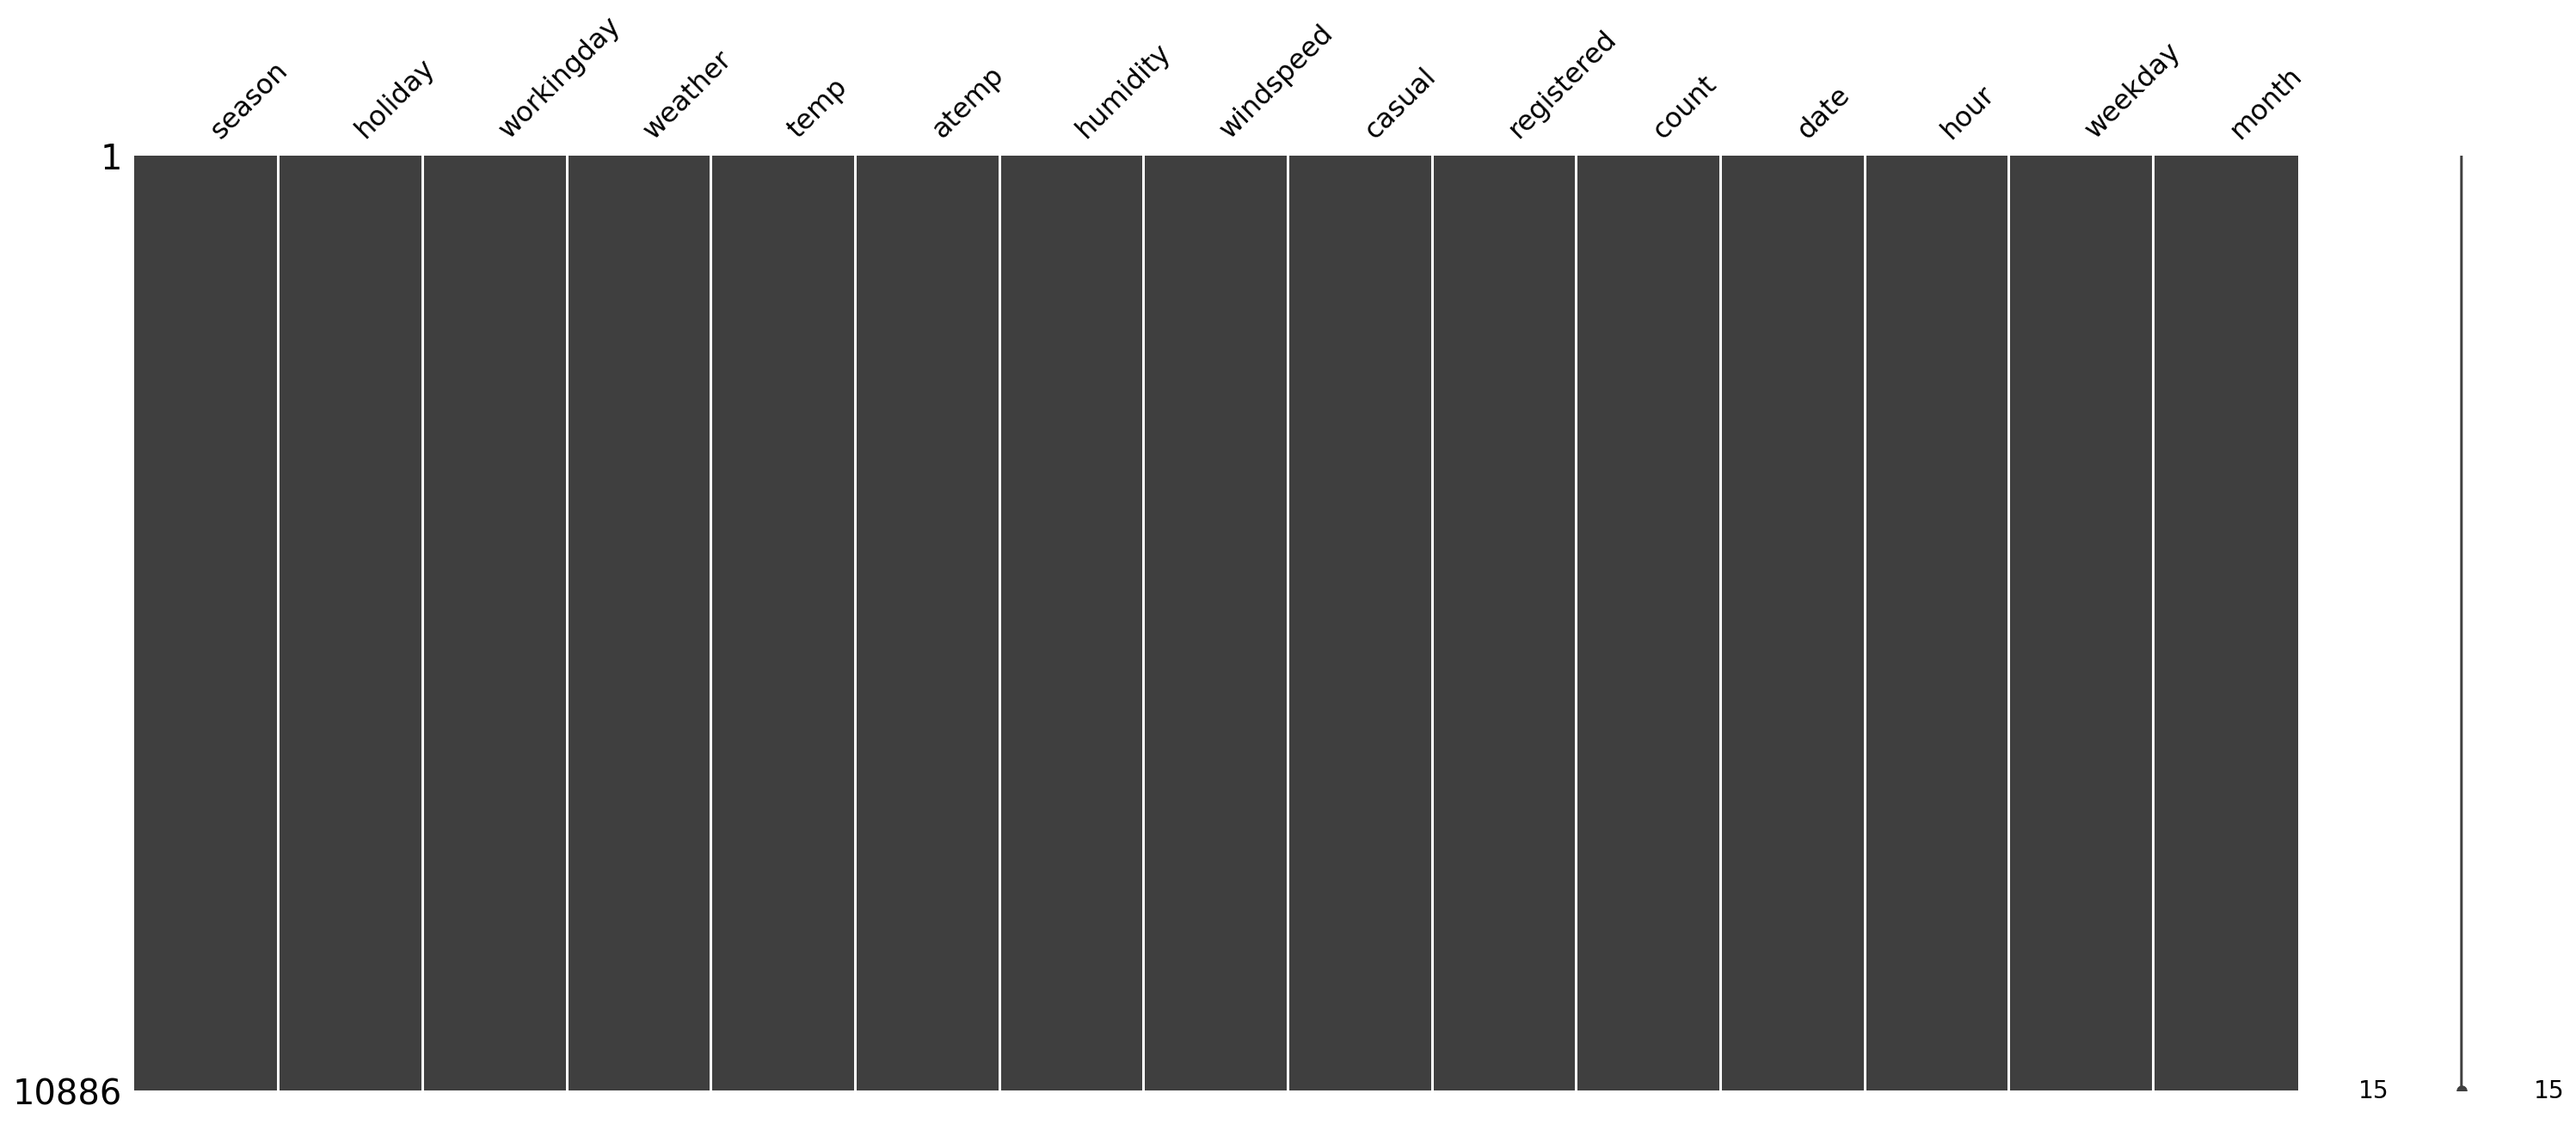

In [15]:
import missingno as msno

msno.matrix(daily_data)

<AxesSubplot:xlabel='workingday', ylabel='count'>

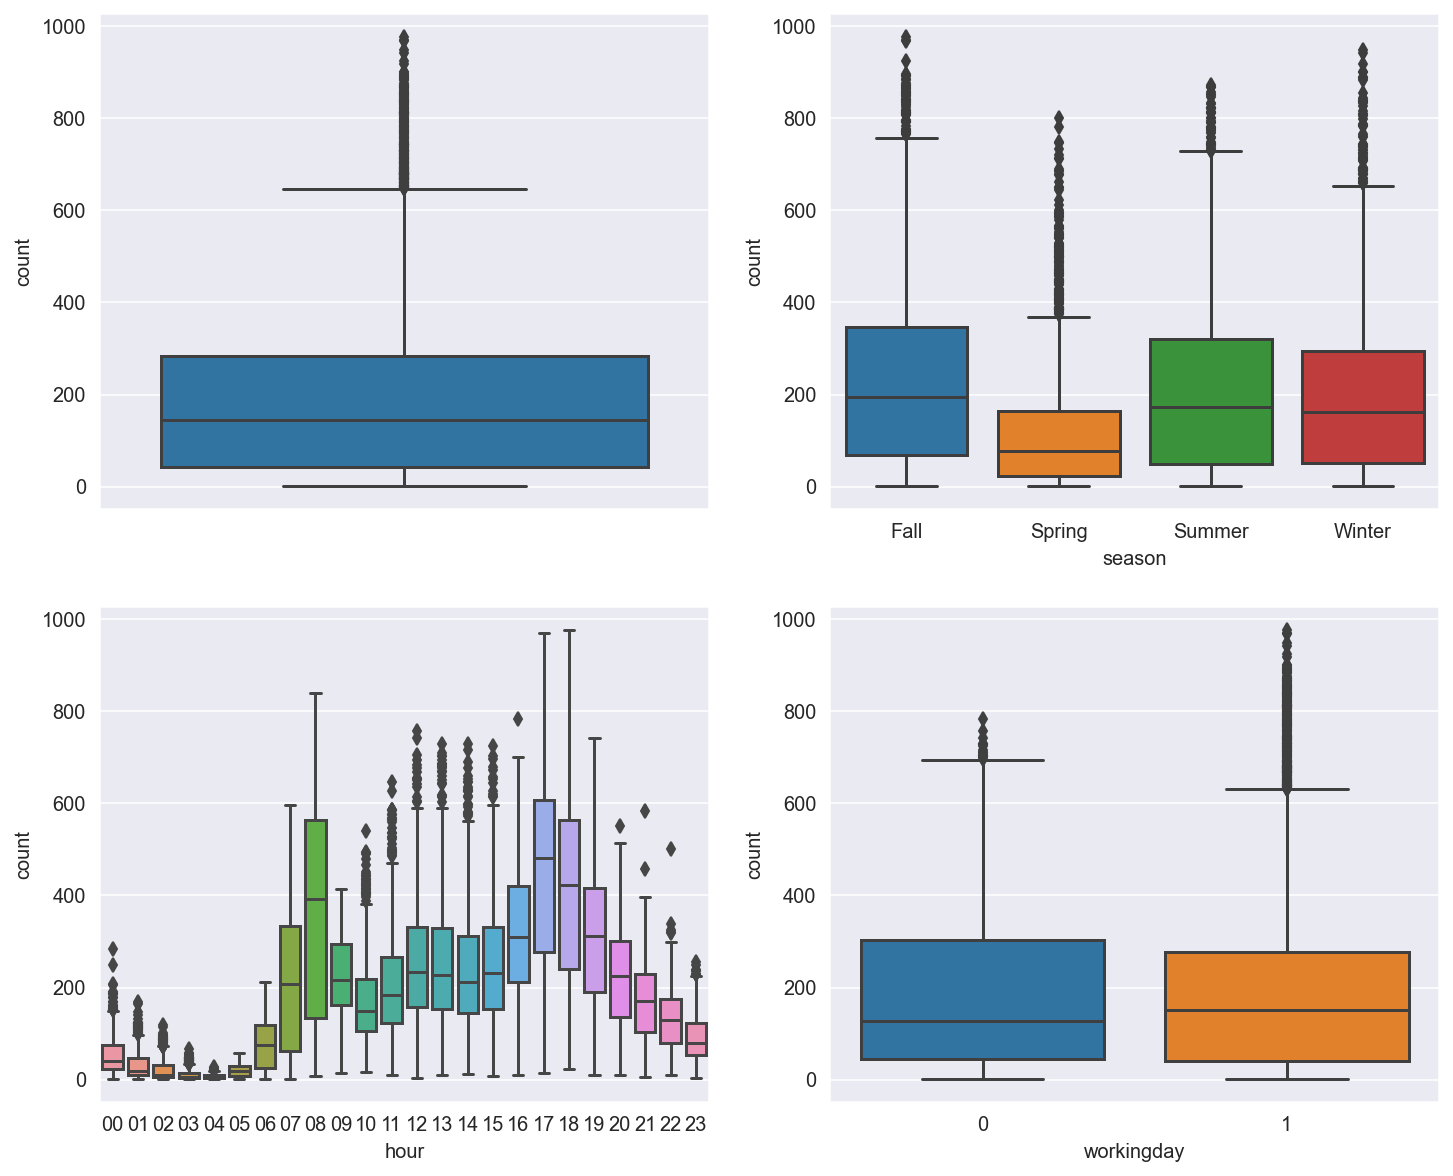

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12, 10)
sns.boxplot(data=daily_data, y='count', ax=axes[0][0])
sns.boxplot(data=daily_data, y='count', x='season', ax=axes[0][1])
sns.boxplot(data=daily_data, y='count', x='hour', ax=axes[1][0])
sns.boxplot(data=daily_data, y='count', x='workingday', ax=axes[1][1])

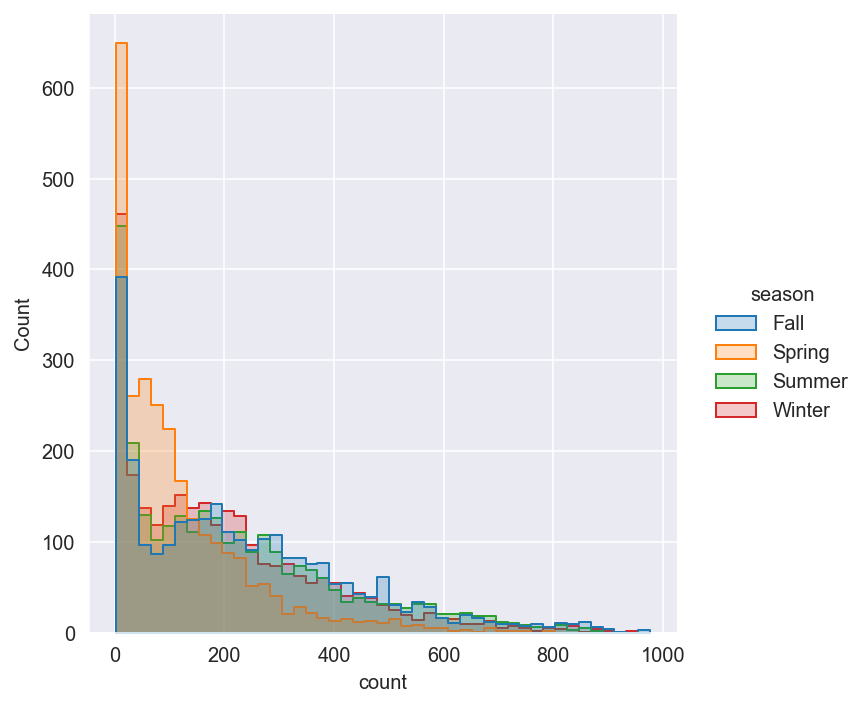

In [17]:
sns.displot(daily_data, x='count', hue='season', element="step")

In [18]:
data_without_outliers = daily_data[
    np.abs(daily_data['count'] - daily_data['count'].mean()) <= 3 * daily_data['count'].std()
]
data_without_outliers.shape

(10739, 15)

<ipython-input-19-dbfa00be93e8>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


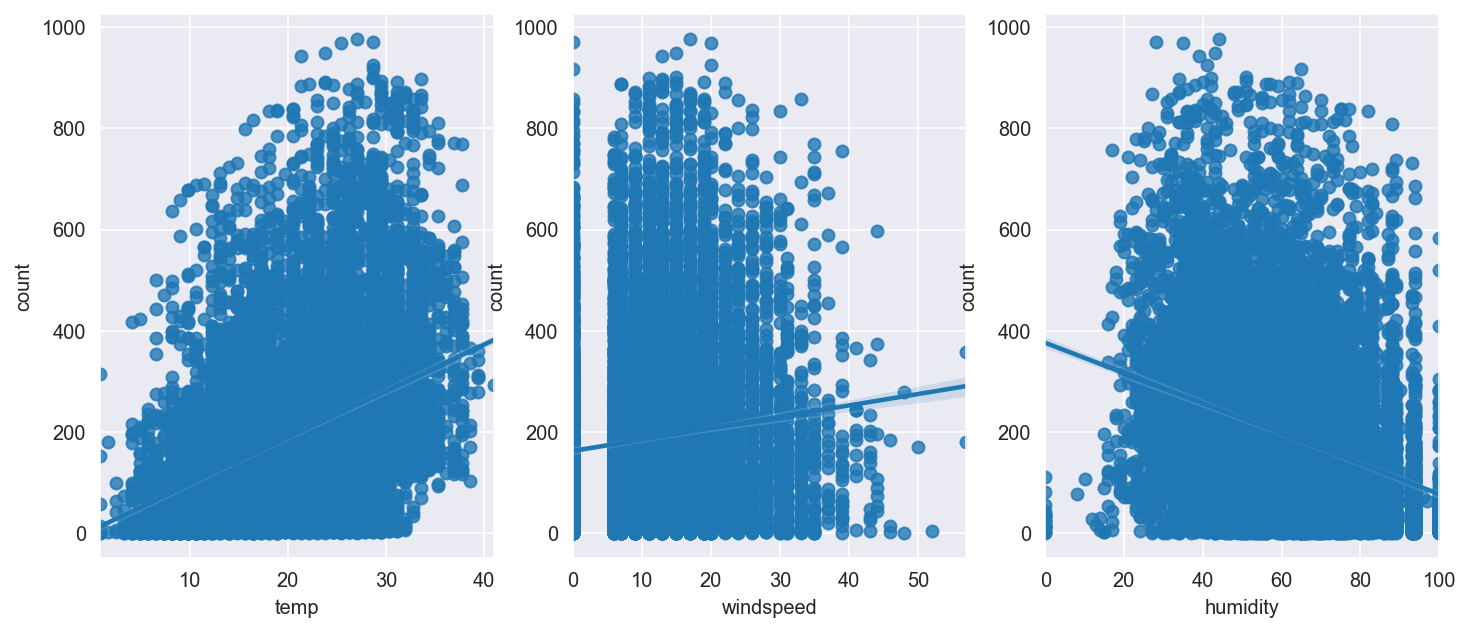

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(12, 5)
sns.regplot(data=daily_data, x='temp', y='count', ax=ax1)
sns.regplot(data=daily_data, x='windspeed', y='count', ax=ax2)
sns.regplot(data=daily_data, x='humidity', y='count', ax=ax3)
fig.show()

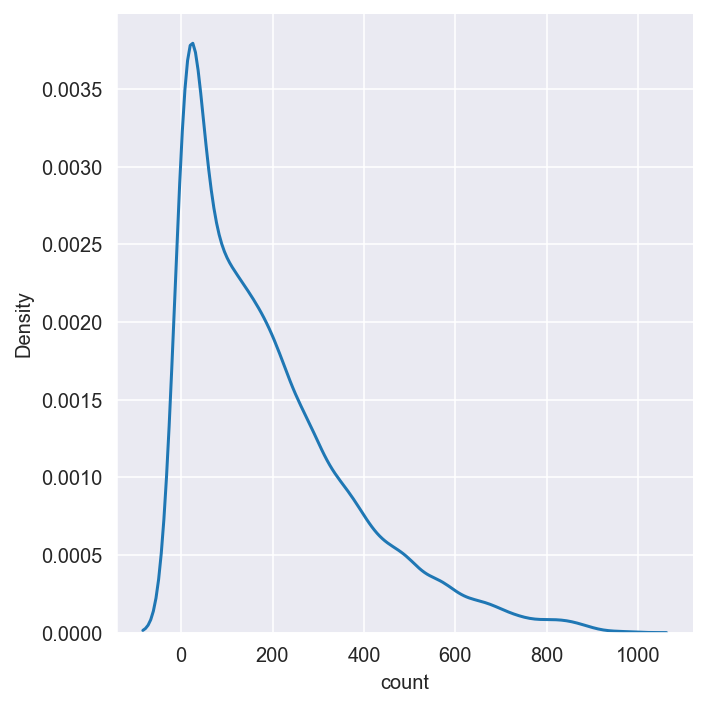

In [20]:
sns.displot(data=daily_data, x='count', kind='kde')

In [21]:
dataTrain = pd.read_csv("../data/train.csv")
dataTest = pd.read_csv("../data/test.csv")

In [22]:
data = dataTrain.append(dataTest)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [23]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [24]:
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered"]

In [25]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

In [34]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = dataTest["datetime"]
yLabels = dataTrain["count"]
yLablesRegistered = dataTrain["registered"]
yLablesCasual = dataTrain["casual"]

In [35]:
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

In [38]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

dataTrain

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday,month
0,1,0,0,1,9.84,14.395,81,0.0000,0,2011,5,1
1,1,0,0,1,9.02,13.635,80,0.0000,1,2011,5,1
2,1,0,0,1,9.02,13.635,80,0.0000,2,2011,5,1
3,1,0,0,1,9.84,14.395,75,0.0000,3,2011,5,1
4,1,0,0,1,9.84,14.395,75,0.0000,4,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,19,2012,2,12
10882,4,0,1,1,14.76,17.425,57,15.0013,20,2012,2,12
10883,4,0,1,1,13.94,15.910,61,15.0013,21,2012,2,12
10884,4,0,1,1,13.94,17.425,61,6.0032,22,2012,2,12


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01); ### Test 0.41
yLabelsLog = np.log1p(yLabels)
gbm.fit(dataTrain,yLabelsLog)
print(yLabelsLog)
preds = gbm.predict(X= dataTrain)
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count, Length: 10886, dtype: float64


In [30]:
predsTest = gbm.predict(X= dataTest)

In [31]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        # "count": [max(0, x) for x in np.exp(predsTest)]
        "count": [max(0, x) for x in predsTest]
    })
submission.to_csv('./../data/out/sol1_no_wind_no_log.csv', index=False)